# 鹿検知コンペ測量見積もり

## 目的
10月に開催される鹿検知コンペの鹿ダミー位置の測量の誤差を見積もる。

## ドローン機体仕様
- camera: DJI X5S
- 焦点距離：45mm
- CCDイメージサイズ(HxW)：13.0mm x 17.3mm
- CCDイメージ画素数：縦3956画素、横5280画素

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from glob import glob
from PIL import Image
from PIL.ExifTags import TAGS
from gistool import get_GPS, get_datetime
%matplotlib notebook

## 画像ファイルのプロファイル取得

Enter pathname: img
OK! The pathname is valid.
Saved the profile data in:
C:\Users\takeshi\pyworks\drone\img_flist.csv 



<IPython.core.display.Javascript object>


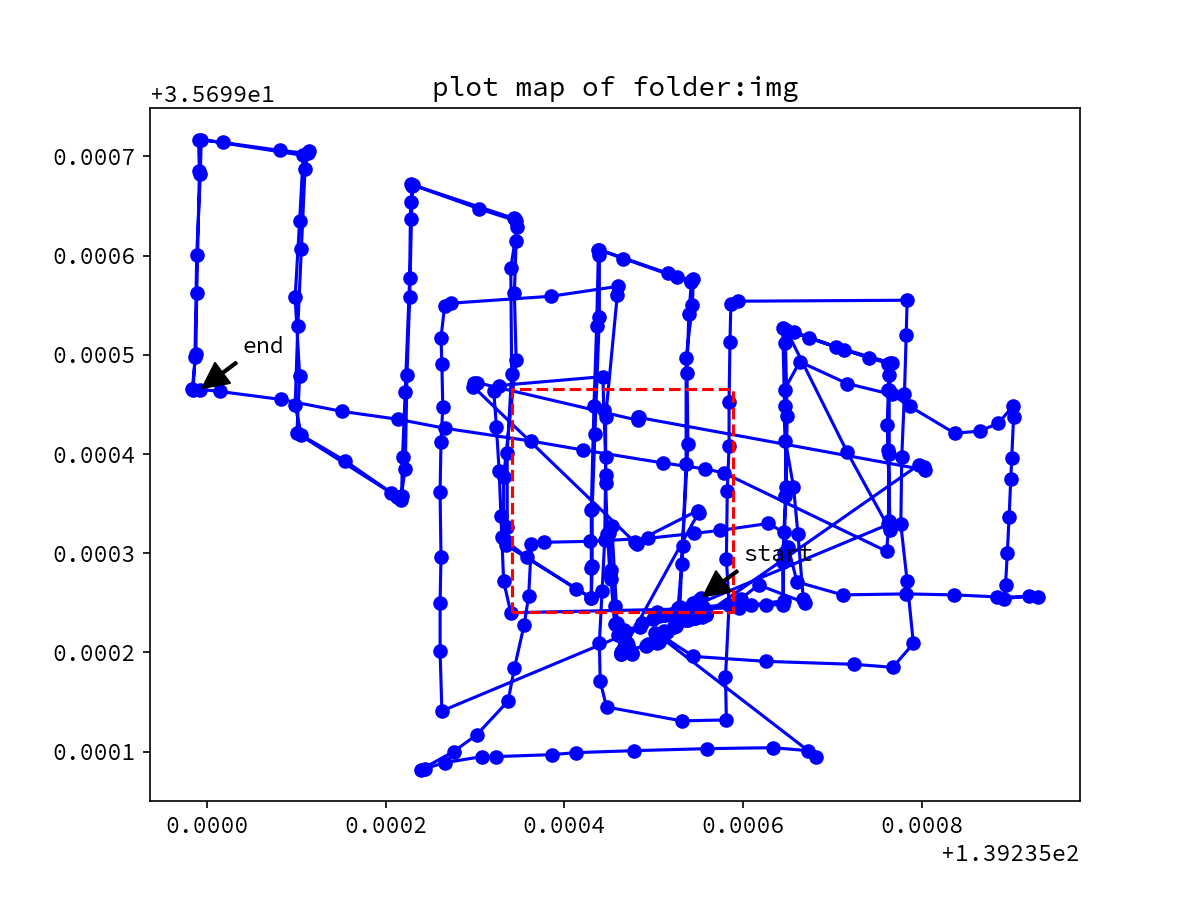

In [9]:
%run imgprofile.py

In [8]:
df.describe()

,lat,lon,alt
count,332.000000,332.000000,332.000000
mean,35.699361,139.235478,257.970669
std,0.000151,0.000209,46.675937
min,35.699082,139.234984,184.740000
25%,35.699241,139.235341,204.717000
50%,35.699330,139.235496,261.054000
75%,35.699466,139.235588,316.155000
max,35.699717,139.235929,336.255000


In [ ]:
(35.699241, 139.235341)
(35.699466, 139.235588)

In [3]:
imgpath = os.path.join(os.getcwd(), "img")
imglst = glob(os.path.join(imgpath, '*.JPG'))
flst = [os.path.basename(f) for f in imglst]
df = pd.DataFrame(imglst, columns=["fpath"])
df['fname'] = df['fpath'].map(os.path.basename)

gps_keys = ['lat', 'lon', 'alt']
for k in gps_keys:
    df[k] = df['fpath'].map(get_GPS).apply(pd.Series)[k].apply(pd.Series)
df['DateTime'] = df['fpath'].map(get_datetime)

# プロファイルのCSV出力
# df.to_csv('file_list.csv', columns=['fname', 'DateTime', 'lat', 'lon', 'alt'])


In [4]:
df.head()

,fpath,fname,lat,lon,alt,DateTime
0,C:\Users\takeshi\pyworks\drone\img\DJI_0001.JPG,DJI_0001.JPG,35.699255,139.235553,184.784,2017:10:02 09:04:12
1,C:\Users\takeshi\pyworks\drone\img\DJI_0002.JPG,DJI_0002.JPG,35.699253,139.235551,184.791,2017:10:02 09:04:15
2,C:\Users\takeshi\pyworks\drone\img\DJI_0003.JPG,DJI_0003.JPG,35.699253,139.235550,184.781,2017:10:02 09:04:19
3,C:\Users\takeshi\pyworks\drone\img\DJI_0004.JPG,DJI_0004.JPG,35.699247,139.235544,189.773,2017:10:02 09:06:07
4,C:\Users\takeshi\pyworks\drone\img\DJI_0005.JPG,DJI_0005.JPG,35.699248,139.235543,189.773,2017:10:02 09:06:09


In [5]:
df.shape

(332, 6)

In [9]:
exp1 = df.loc[:29]
exp1.tail()

,fpath,fname,lat,lon,alt,DateTime
25,C:\Users\takeshi\pyworks\drone\img\DJI_0026.JPG,DJI_0026.JPG,35.699221,139.235468,314.973,2017:10:02 09:10:48
26,C:\Users\takeshi\pyworks\drone\img\DJI_0027.JPG,DJI_0027.JPG,35.699221,139.235468,314.873,2017:10:02 09:10:51
27,C:\Users\takeshi\pyworks\drone\img\DJI_0028.JPG,DJI_0028.JPG,35.699207,139.235471,335.673,2017:10:02 09:11:12
28,C:\Users\takeshi\pyworks\drone\img\DJI_0029.JPG,DJI_0029.JPG,35.699209,139.235470,335.673,2017:10:02 09:11:15
29,C:\Users\takeshi\pyworks\drone\img\DJI_0030.JPG,DJI_0030.JPG,35.699210,139.235470,335.673,2017:10:02 09:11:17


In [10]:
exp1.describe()

,lat,lon,alt
count,30.000000,30.000000,30.000000
mean,35.699237,139.235516,244.560900
std,0.000013,0.000031,52.175972
min,35.699207,139.235467,184.781000
25%,35.699231,139.235490,194.798000
50%,35.699240,139.235522,235.073000
75%,35.699246,139.235544,284.973000
max,35.699255,139.235553,335.673000


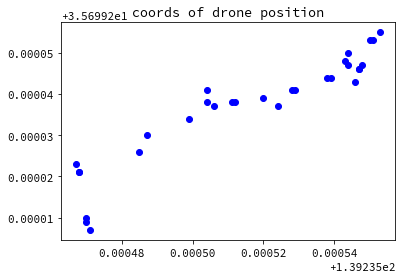

In [11]:
fig = plt.figure()
plt.plot(exp1.lon, exp1.lat, "bo")
plt.title('coords of drone position')
plt.show()

In [14]:
from math import pi, cos, sin
pi

3.141592653589793

In [16]:
POLE_RADIUS = 6356752.314
EQUATOR_RADIUS = 6378137
lon_degree = ( 360 * 1000 ) / ( 2 * pi * ( EQUATOR_RADIUS * cos(lat0 * pi / 180.0) ) )
lon_degree

0.011061754871474152

In [15]:
lon0 = exp1.lon.loc[0]
lat0 = exp1.lat.loc[0]
delta_lon = exp1.lon.max() - exp1.lon.min()
delta_lat = exp1.lat.max() - exp1.lat.min()
delta_lon, delta_lat

(8.6000000010244548e-05, 4.7999999999603915e-05)

In [20]:
exp = df.loc[30:46]
exp

,fpath,fname,lat,lon,alt,DateTime
30,C:\Users\takeshi\pyworks\drone\img\DJI_0031.JPG,DJI_0031.JPG,35.699341,139.235550,185.494,2017:10:02 09:12:55
31,C:\Users\takeshi\pyworks\drone\img\DJI_0032.JPG,DJI_0032.JPG,35.699342,139.235549,185.508,2017:10:02 09:12:57
32,C:\Users\takeshi\pyworks\drone\img\DJI_0033.JPG,DJI_0033.JPG,35.699343,139.235549,185.522,2017:10:02 09:13:00
33,C:\Users\takeshi\pyworks\drone\img\DJI_0034.JPG,DJI_0034.JPG,35.699311,139.235479,186.143,2017:10:02 09:17:39
34,C:\Users\takeshi\pyworks\drone\img\DJI_0035.JPG,DJI_0035.JPG,35.699309,139.235481,186.135,2017:10:02 09:17:41
35,C:\Users\takeshi\pyworks\drone\img\DJI_0036.JPG,DJI_0036.JPG,35.699468,139.235298,185.877,2017:10:02 09:18:09
36,C:\Users\takeshi\pyworks\drone\img\DJI_0037.JPG,DJI_0037.JPG,35.699472,139.235299,185.842,2017:10:02 09:18:11
37,C:\Users\takeshi\pyworks\drone\img\DJI_0038.JPG,DJI_0038.JPG,35.699472,139.235302,185.847,2017:10:02 09:18:12
38,C:\Users\takeshi\pyworks\drone\img\DJI_0039.JPG,DJI_0039.JPG,35.699434,139.235482,185.637,2017:10:02 09:18:36
39,C:\Users\takeshi\pyworks\drone\img\DJI_0040.JPG,DJI_0040.JPG,35.699437,139.235483,185.646,2017:10:02 09:18:37


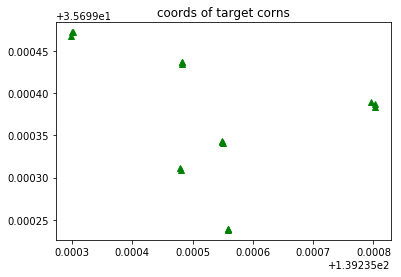

In [27]:
fig = plt.figure()
plt.plot(exp.lon, exp.lat, "g^")
plt.title('coords of target corns')
plt.show()

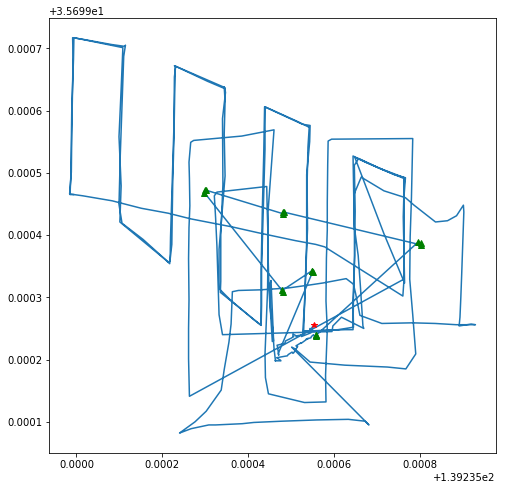

In [25]:
fig = plt.figure(figsize=(8,8))
plt.plot(df.lon, df.lat)
plt.plot(df.lon.loc[0], df.lat.loc[0], "r*")
plt.plot(exp.lon, exp.lat, "g^")
plt.show()

In [4]:
# 写真すべての高度を抽出して、画像と比較する。132は地上レベル
file = df0.fpath.iloc[0]
print(file)
img = Image.open(file)

# Exifデータを取得
exif = img._getexif()
exif

C:\Users\takeshi\pyworks\drone\img\DJI_0031.JPG


{270: 'DCIM\\100MEDIA\\DJI_0031.JPG',
 271: 'DJI\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 272: 'FC6520\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 274: 1,
 282: (72, 1),
 283: (72, 1),
 296: 2,
 305: 'v01.06.1582\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 306: '2017:10:02 09:12:55',
 531: 1,
 33434: (4166, 1000000),
 33437: (800, 100),
 34665: 182,
 34850: 4,
 34853: {0: b'\x02\x03\x00\x00',
  1: 'N',
  2: ((35, 1), (41, 1), (576262, 10000)),
  3: 'E',
  4: ((139, 1), (14, 1), (79783, 10000)),
  5: b'\x00',
  6: (185494, 1000)},
 34855: 800,
 36864: b'0230',
 36867: '2017:10:02 09:12:54',
 36868: '2017:10:02 09:12:54',
 37121: b'\x00\x03\x02\x01',
 37122: (9662912, 2610960),
 37377: (-7898, -1000),
 37378: (600, 100),
 37380: (0, 32),
 37381: (169, 100),
 37382: (0, 100),
 37383: 2,
 37384: 10,
 37385: 32,
 37386: (4500, 100),
 37500: b'!\x00\x01\x00\x02\x00\x04\

In [5]:
exif_table = {}
for tag_id, value in exif.items():
    tag = TAGS.get(tag_id, tag_id)
    exif_table[tag] = value

# 緯度latの読み取り。Nを正、Sを負として処理する。
latDIR = exif_table['GPSInfo'][1]
latTABLE = exif_table['GPSInfo'][2]

if latDIR[0] == "S":
    sgn = -1
else:
    sgn = 1

latDMS = [sgn * float(latTABLE[0][0]), float(latTABLE[1][0]), float(latTABLE[2][0])/latTABLE[2][1]]
latDEG = latDMS[0] + latDMS[1]/60.0 + latDMS[2]/3600.0
latDEG = float("{:.6f}".format(latDEG))

# # 経度lonの読み取り。Eを正、Wを負として処理する。
# lon_dir = exif_table['GPSInfo'][3]
# lon = exif_table['GPSInfo'][4]

lonDIR = exif_table['GPSInfo'][3]
lonTABLE = exif_table['GPSInfo'][4]

if lonDIR[0] == "W":
    sgn = -1
else:
    sgn = 1

lonDMS = [sgn * float(lonTABLE[0][0]), float(lonTABLE[1][0]), float(lonTABLE[2][0])/lonTABLE[2][1]]
lonDEG = lonDMS[0] + lonDMS[1]/60.0 + lonDMS[2]/3600.0
lonDEG = float("{:.6f}".format(lonDEG))

print(latDMS, latDEG, lonDMS, lonDEG)

[35.0, 41.0, 57.6262] 35.699341 [139.0, 14.0, 7.9783] 139.23555


In [6]:
datetime = exif_table['DateTime']

In [7]:
datetime

'2017:10:02 09:12:55'

In [9]:
tag_id = 42035
tag = TAGS.get(tag_id, tag_id)
tag

'LensMake'

In [ ]:
import glob
lst = glob.glob('data/*.JPG')
lst

In [ ]:
data = []
for f in lst:
    gps = gistool.get_GPS(f)
    gps['fname'] = f
    gps['rel_alt'] = gps['alt'] - g0
    data.append(gps)
data

In [ ]:
data_df = pd.DataFrame(data)
data_df

## 座標の変換
### 画像内座標から世界測地系への変換

In [ ]:
# 配列に画像を読み込む
impath = r'data/DJI_0135.JPG'
im = np.array(Image.open(impath))
high, wid = im.shape[:2]

# 画像を表示する
fig = plt.figure(figsize=(8,6))
plt.imshow(im)
plt.axis('off')
plt.plot(wid/2, high/2,'ro') 
plt.show()

In [ ]:
class clicker_class(object):
    def __init__(self, ax):
        self.canvas = ax.get_figure().canvas
        # self.cid = None
        self.pt_lst = []
        self.pt_plot = ax.plot([], [], marker='o', color='r',
                               linestyle='none', zorder=5)[0]
        # self.pix_err = pix_err
        # self.cid = self.canvas.mpl_connect('button_press_event',
        #                                        self.click_event)
        self.connect()

    def connect(self):
        self.cidbutton = self.canvas.mpl_connect('button_press_event',
                                                self.click_event)
        self.cidkeypress = self.canvas.mpl_connect('key_press_event', 
                                                self.press)

    def press(self, event):
        print('press', event.key)
        # sys.stdout.flush()

    def click_event(self, event):
        ''' Extracts locations from the user'''
        print(event)
        # if event.key == 'shift':
        #     self.pt_lst = []
        #     return
        # if event.xdata is None or event.ydata is None:
        #     return
        if event.button == 1:
            self.pt_lst.append((event.xdata, event.ydata))
        elif event.button == 3:
            self.remove_pt((event.xdata, event.ydata))

        self.redraw()

    def remove_pt(self, loc):
        if len(self.pt_lst) > 0:
            self.pt_lst.pop(np.argmin(map(lambda x:
                                          np.sqrt((x[0] - loc[0]) ** 2 +
                                                  (x[1] - loc[1]) ** 2),
                                          self.pt_lst)))

    def redraw(self):
        if len(self.pt_lst) > 0:
            x, y = zip(*self.pt_lst)
        else:
            x, y = [], []
        self.pt_plot.set_xdata(x)
        self.pt_plot.set_ydata(y)
        self.canvas.draw()

impath = r'data/DJI_0135.JPG'
im = np.array(Image.open(impath))
high, wid = im.shape[:2]

# 画像を表示する
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.imshow(im)
plt.axis('off')
plt.plot(wid/2, high/2,'r*') 

cc = clicker_class(ax)
plt.show()  

In [ ]:
cc.pt_lst

In [ ]:
df = pd.DataFrame(cc.pt_lst, columns= ['xdata', 'ydata'])
df

In [ ]:
high, wid

In [ ]:
x_center = wid/2
y_center = high/2
x_center, y_center

In [ ]:
x, y = cc.pt_lst[0]
x,y

In [ ]:
height = 50


In [ ]:
ccd_num_v = 3456 # num of ccd images vertical
ccd_num_h = 4608 # num of ccd images horizontal

ccd_size_v = 13		# vertical ccd image size [mm]
ccd_size_h = 17.3	# horizontal ccd image size [mm]

f_length = 25 # focal length [mm]

ccd_pitch_v = float(ccd_size_v/ccd_num_v)
ccd_pitch_h = float(ccd_size_h/ccd_num_h)

img_size_v = ccd_size_v/float(f_length)*height
img_size_h = ccd_size_h/float(f_length)*height

print("Image size height [m]: {:.1f}".format(img_size_v))
print("Image size width [m]: {:.1f}".format(img_size_h))

In [ ]:
xd = img_size_h/ccd_num_h * (x - x_center)
yd = img_size_v/ccd_num_v * (y - y_center)

In [ ]:
lat_deg_tokyo = 139.767052
lon_deg_tokyo = 35.681167
dms= deg2dms(lon_deg_tokyo)
result = dms2deg(dms)
print(lon_deg_tokyo, dms, result)

In [ ]:
from math import modf
def deg2dms(deg_num):
    # 緯度・経度をDEG形式からDMS形式へ変換する
    res, deg = modf(deg_num)
    res, min = modf(res * 60)
    sec = res * 60
    return int(deg), int(min), round(sec, 3)

def dms2deg(dms_num):
    deg_num = dms_num[0] + dms_num[1]/60.0 + dms_num[2]/3600.0
    return round(deg_num, 6)

In [ ]:
lat_ex = data_df['lat'].iloc[2]
lon_ex = data_df['lon'].iloc[2]
lat_ex, lon_ex

In [ ]:
lat_dms_ex = deg2dms(lat_ex)
lon_dms_ex = deg2dms(lon_ex)
lat_dms_ex, lon_dms_ex

In [ ]:
from math import pi, cos, sin
pi

In [ ]:
POLE_RADIUS = 6356752.314
JAPAN_LATITUDE = 35
EQUATOR_RADIUS = 6378137
lon_degree = ( 360 * 1000 ) / ( 2 * pi * ( EQUATOR_RADIUS * cos(JAPAN_LATITUDE * pi / 180.0) ) )
lon_degree
# => 0.010966404715491394

In [ ]:
yd_deg = yd / POLE_RADIUS * 180 / pi
lat_result = lat_ex - yd_deg
deg2dms(lat_result)

In [ ]:
xd_deg = xd * 180 / (pi * EQUATOR_RADIUS * cos(JAPAN_LATITUDE * pi / 180.0))
lon_result = lon_ex + xd_deg
deg2dms(lon_result)

In [ ]:
xd, yd

In [ ]:
plt.savefig('sample.jpg')

In [ ]:
xd, yd

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
zipped = zip(x, y)
list(zipped)

In [ ]:
# 画像の方位角（上向きの角度。真北を基準として反時計回りに角度表示）
img_dir = 10

x2 = cos(img_dir * pi / 180.0) * x + sin(img_dir * pi / 180.0) * (high - y)
y2 = -sin(img_dir * pi / 180.0) * x + cos(img_dir * pi / 180.0) * (high - y)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlim([0,wid])
plt.ylim([0,high])
# plt.axis('off')
plt.plot(wid/2, high/2,'r*') 
plt.plot(x,high-y, 'bo')
plt.plot(x2, y2, 'g^')
plt.show()